# Forecast of Norway's electrical vehicle market
_by Roald Ruiter, 10 November 2017_

Norway has been aggressively promoting the purchase of electric cars. Currently about half of the sold cars are electric. So how long will it take them to replace all their internal combustion cars for electric ones?

Well, from the [Global EV outlook 2017](https://www.iea.org/publications/freepublications/publication/GlobalEVOutlook2017.pdf) table 5 page 49 we can obtain the total amount of electric cars in the country. Second, the total amount of private cars in Norway is about [2.7 million](https://www.ssb.no/en/bilreg). If we also include the vans it becomes 3.1 million.

Let's use these figures to find out find out when all internal combustion cars will be replaced, using a [model](https://github.com/Roald87/ev_forecast/blob/master/Market_share_electric_vehicles.ipynb) I made earlier.

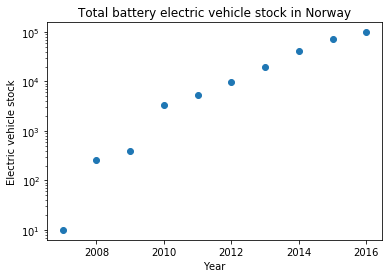

In [5]:
from forecast import Forecast
import numpy as np
import matplotlib.pyplot as plt

# The input data from the Global EV outlook 2017
EV_stock = np.array([
  10,
 260,
 400,
 3350,
 5380,
 9550,
 19680,
 41800,
 72040,
 98880,
 ])
stock_years = np.array([year for year, _ in enumerate(EV_stock, 2007)])

plt.scatter(stock_years, EV_stock)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Electric vehicle stock')
plt.title('Total battery electric vehicle stock in Norway')
plt.show()

## Thoughts on the data 

The years 2007 - 2009, are a bit off from the rest of the data. For the first try I'll exclude these years.

## Fitting the exponential growht phase

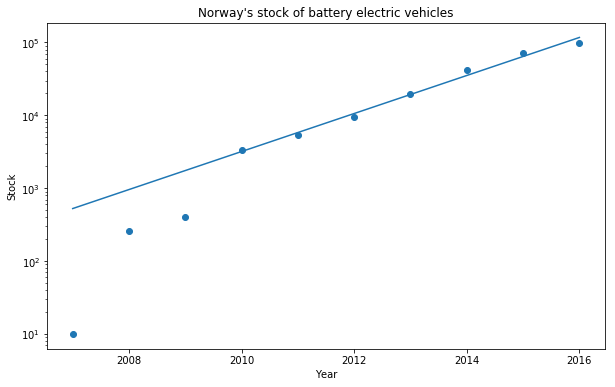

The growth rate is 1.66 years and the transition year is 2017.
The meaning of the growth rate is that each 1.66 years the amount of electric vehicles grows by a factor of exp(1) = 2.72


In [6]:
ev_forecast = Forecast(EV_stock, stock_years, saturation=2.6e6, tau_life=15)
# Excluding the years 2007-2009 from the fit
ev_forecast.set_fit_range(stock_years[3:])
ev_forecast.set_plot_labels(
    'Year', 'Stock',
    "Norway's stock of battery electric vehicles"
)

ev_forecast.plot_exponential_phase(figsize=(10,6))

growth_rate = float(ev_forecast.tau_exp)
print('The growth rate is {:.2f} years and the transition year is {}.'
      .format(growth_rate, ev_forecast.get_transistion_year()))
print('The meaning of the growth rate is that each {:.2f} years the amount of '
      'electric vehicles grows by a factor of exp(1) = 2.72'
      .format(growth_rate))

## Thoughts on the exponential growth phase

Based on the model, this year (2017) is when the exponential growth of the Norwegian electric vehicle market will stop and transition to a linear growth. 

## Looking at the complete picture

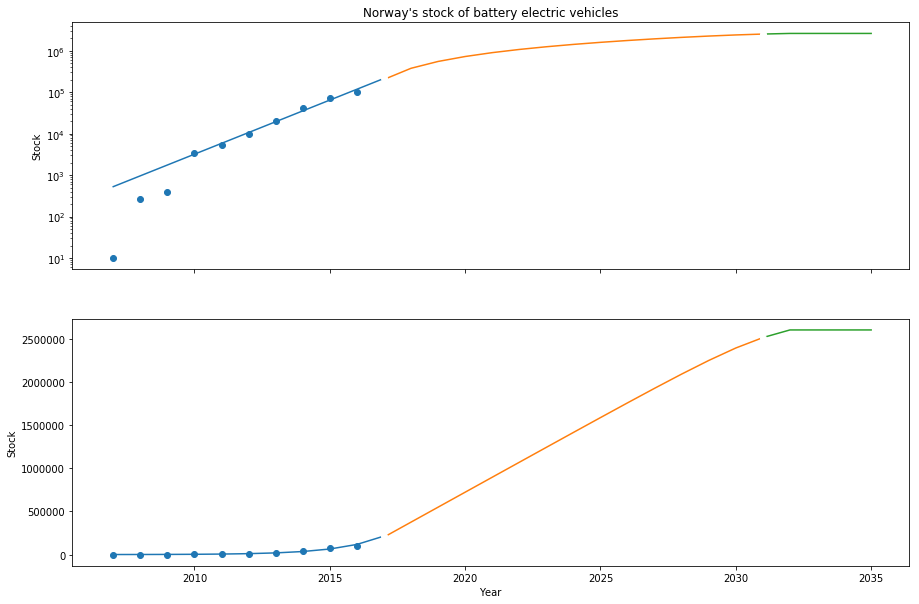

The earliest at which all vehicles in Norway can be replaced by electrical ones is 2032. That is assuming a car lifetime of 15 years and a total 2.6 million vehicles in the country.


In [10]:
ev_forecast.plot_all_phases(figsize=(15, 10))

print('The earliest at which all vehicles in Norway can be replaced '
      'by electrical ones is {}. That is assuming a car lifetime of '
      '{} years and a total {} million vehicles in the country.'
     .format(ev_forecast.get_saturation_year(),
             ev_forecast.tau_life,
             ev_forecast.saturation/1e6))


## Exploring different market sizes/vehicle lifetimes

So what if the market is bigger or the vehicle lifetime is shorter?

In [17]:
for saturation, lifetime in [(2.6e6, 10), (3.1e6, 15), (3.1e6, 10)]:
    ev_forecast = Forecast(EV_stock, stock_years, saturation=saturation, tau_life=lifetime)
    # Excluding the years 2007-2009 from the fit
    ev_forecast.set_fit_range(stock_years[3:])
    print('Replacing {} million vehicles, assuming a car lifetime of {} years, '
          'can be done by {}.\n'
          'The transition from exponential to linear growth will take place around {}'
          .format(
              saturation/1e6, 
              lifetime, 
              ev_forecast.get_saturation_year(), 
              ev_forecast.get_transistion_year())
         )

Replacing 2.6 million vehicles, assuming a car lifetime of 15 years, can be done by 2032.
The transition from exponential to linear growth will take place around 2017
Replacing 2.6 million vehicles, assuming a car lifetime of 10 years, can be done by 2028.
The transition from exponential to linear growth will take place around 2018
Replacing 3.1 million vehicles, assuming a car lifetime of 15 years, can be done by 2033.
The transition from exponential to linear growth will take place around 2018
Replacing 3.1 million vehicles, assuming a car lifetime of 10 years, can be done by 2028.
The transition from exponential to linear growth will take place around 2018


## What if we include all data?

So also the data from 2007-2009

In [14]:
for saturation, lifetime in [(2.6e6, 15), (2.6e6, 10), (3.1e6, 15), (3.1e6, 10)]:
    ev_forecast = Forecast(EV_stock, stock_years, saturation=saturation, tau_life=lifetime)
    print('Replacing {} million vehicles, assuming a car lifetime of {} years, '
          'can be done by {}.'
          .format(saturation/1e6, lifetime, ev_forecast.get_saturation_year()))

Replacing 2.6 million vehicles, assuming a car lifetime of 15 years, can be done by 2031.
Replacing 2.6 million vehicles, assuming a car lifetime of 10 years, can be done by 2026.
Replacing 3.1 million vehicles, assuming a car lifetime of 15 years, can be done by 2031.
Replacing 3.1 million vehicles, assuming a car lifetime of 10 years, can be done by 2026.
